
# Project: Investigate a Dataset (TMDB Movies)
The TMDb movie dataset provide many information on all movies. 
The TMDb movie dataset provide many information on all movies. The data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies basic move information and movie matrices, including user ratings, popularity and revenue data. These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
        
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**In this report I am going to explore following questions : **
    
    Question 1: Which movies are the most profitable to the market?
    Question 2: Which movie has the Least and maximum profit , budget, runtime?
    Question 3: Top 10 movies by profit , budget, runtime?
    Question 4: Which years do movies made the most profits ?
    Question 5: Movie Release years vs Total budget made by movies ?
    Question 6: No. of movies release in every month of a year?
    Question 7: Find the top casts, directors and genres?
    Question 8: What is the Average Budget of the movies?
    Question 9: What is the Average Revenue earned by the movies?
    Question 10: What is the Average duration of the movies?

<a id='intro'></a>
## Introduction
 The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib. 
 
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this process the main idea is to take a quick glance on the data set, find the potential unreasonable data value, unnecessary variables for my research question, null data or duplicates, and then make data clearing decisions.
•	Basic Exploration

•	Null values and zero values:
	
    Zero Values in Budget and Revenue Columns
	Zero Values in Runtime Columns
    
•	Data Cleaning 
	
    Drop Duplicates
	Replace zero values with null values




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
tmdb_df.shape

(10866, 21)

#### 1. Deleting the columns that is not required

In [4]:
#Deleting the columns that is not required
# list of columns that are to be deleted/dropped

tmdb_df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage',  'tagline', 'keywords', 
              'production_companies','vote_average','vote_count','overview'], axis=1, inplace=True)


In [5]:
#print two rows of data set
tmdb_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


In [12]:
#print summary of the data set
tmdb_df.describe()

,popularity,budget,revenue,runtime,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [6]:
# count no. of rows containing null values
tmdb_df.isnull().sum()


popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

#### 2. Delete duplicate rows in the dataset



In [7]:
#Need to remove duplicate rows from the dataset
#to check duplicate  values
tmdb_df.duplicated().sum()

1

In [9]:
#delete duplicates values 
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.shape

(10865, 10)

#### 3. Changing Format Of Release Date Into Datetime Format

In [10]:
#Changing Format Of Release Date Into Datetime Format
tmdb_df['release_date']= pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [11]:
#change budget and revenue into integer
tmdb_df['budget'] = tmdb_df['budget'].astype(int)
tmdb_df['revenue'] = tmdb_df['revenue'].astype(int)

#### 4. Check Zero and Null values in Budget and revenue and drop them

In [18]:
# I see lot of values is zero in budget and revenue column
#lets ee how many zeros they have
print (tmdb_df[tmdb_df['budget']==0].shape)
print (tmdb_df[tmdb_df['revenue']==0].shape)


(5696, 10)
(6016, 10)


In [12]:
#drop null values
tmdb_df['budget'] = tmdb_df['budget'].replace(0, np.NaN)
tmdb_df['revenue'] = tmdb_df['revenue'].replace(0, np.NaN)

tmdb_df.dropna(inplace =True)

In [13]:
tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1. Which movies are the most profitable to the market? 

In [14]:
# Create a Profit column to check the most profitable movie

tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget']
tmdb_df['revenue'] = tmdb_df['revenue'].astype(int)
tmdb_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09


In [22]:
#top 10 movies

tmdb_df.sort_values(['profit'], ascending = False).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
5231,4.355219,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,1.645034e+09
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09
4361,7.637767,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,2012,1.299558e+09
3374,5.711315,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,2011-07-07,2011,1.202818e+09
14,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,2015,1.125036e+09
5422,6.112766,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,2013-11-27,2013,1.124219e+09
8094,1.136610,22000000.0,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995-07-28,1995,1.084280e+09
8,7.404165,74000000.0,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2015,1.082731e+09


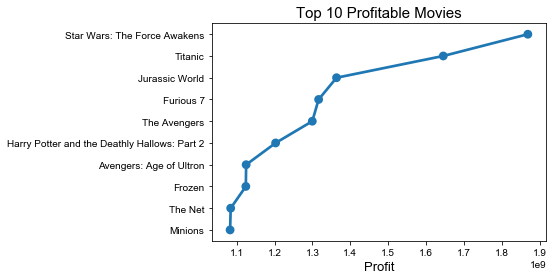

In [15]:
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(tmdb_df['profit'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)


#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

### Question 2  : Which movie has the Least and maximum profit , budget, runtime?

In [16]:
def max_min_data(column_name):
    
    # Find the max from the index number in the column, store to df
    highest_movie = tmdb_df[column_name].idxmax()
    highest = pd.DataFrame(tmdb_df.loc[highest_movie])
    
    # Find the min from the index number in the column, store to df
    lowest_movie = tmdb_df[column_name].idxmin()
    lowest = pd.DataFrame(tmdb_df.loc[lowest_movie])
    
    #concatenating two dfs
    max_min_data = pd.concat([highest, lowest], axis = 1)
    
    return max_min_data





In [17]:
max_min_data('profit')

,3,1386
popularity,11.1731,9.43277
budget,2e+08,2.37e+08
revenue,2068178225,-1513461449
original_title,Star Wars: The Force Awakens,Avatar
cast,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,J.J. Abrams,James Cameron
runtime,136,162
genres,Action|Adventure|Science Fiction|Fantasy,Action|Adventure|Fantasy|Science Fiction
release_date,2015-12-15 00:00:00,2009-12-10 00:00:00
release_year,2015,2009


In [18]:
max_min_data('budget')

,2244,2618
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


In [19]:
max_min_data('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


### Question 3  : Top 10 movies by profit , budget, runtime 

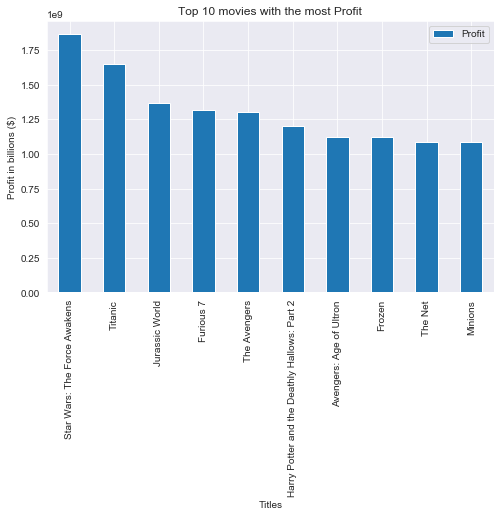

In [20]:
# Create a bar graph for the top 10 most profitable movies 


# First sort the raw data by the profit.
sorted_profit = tmdb_df['profit'].sort_values(ascending=False)[:10]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(tmdb_df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plot
high_profit.plot(kind ='bar',figsize=(8,5))
plt.title('Top 10 movies with the most Profit');
plt.ylabel('Profit in billions ($)');

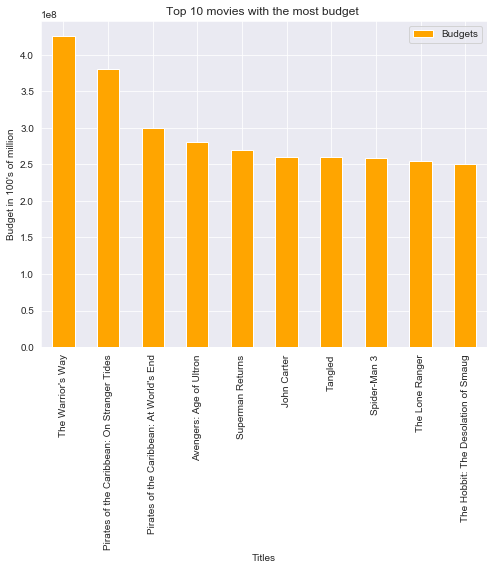

In [21]:
#top 10 movies by budget

sorted_budget = tmdb_df['budget'].sort_values(ascending=False)[:10]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(tmdb_df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,6), color='orange')
plt.title('Top 10 movies with the most budget ');
plt.ylabel('Budget in 100\'s of million');

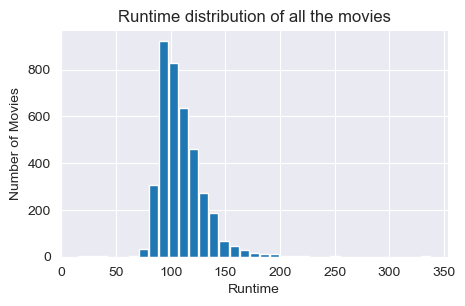

In [22]:
# Create a histogram for movie runtimes.
plt.figure(figsize=(5,3), dpi=100)
tmdb_df['runtime'].hist(rwidth = 0.9, bins =35)
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all the movies');


#### Question 4: Which years do movies made the most profits ?

In [24]:
# First group total profit by each years
profit_yr = tmdb_df.groupby('release_year')['profit'].sum()
profit_yr.tail(5)

release_year
2011    1.496669e+10
2012    1.656595e+10
2013    1.578274e+10
2014    1.667620e+10
2015    1.903215e+10
Name: profit, dtype: float64

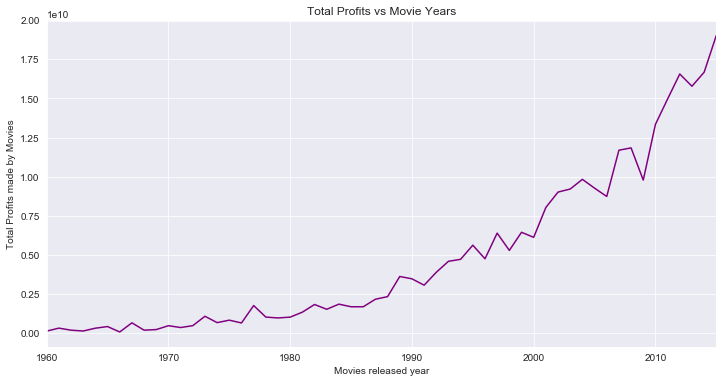

In [35]:
# plot 

profit_yr.plot(figsize = (12,6), color="purple")
plt.xlabel('Movies released year')
plt.ylabel('Total Profits made by Movies')
plt.title('Total Profits vs Movie Years');

#### Question 5: Movie Release years vs Total budget made by movies ?

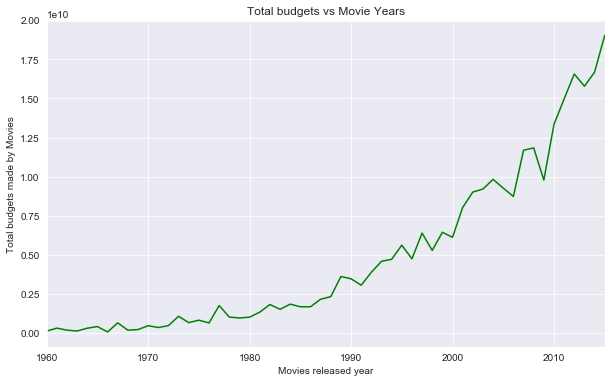

In [36]:
# Totaal buget vs movie years
budget_yr = tmdb_df.groupby('release_year')['budget'].sum()
budget_yr.head(5)

# plot the above query
profit_yr.plot(figsize = (10,6), color='green')
plt.xlabel('Movies released year')
plt.ylabel('Total budgets made by Movies')
plt.title('Total budgets vs Movie Years');

#### Question 6. No. of movies release in every month of a year?

In [42]:
#extract the month number from the release date.
month_release = tmdb_df['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

number_of_release



,release_date,month
1,225,Jan
2,257,Feb
3,279,Mar
4,266,Apr
5,291,May
6,340,Jun
7,314,Jul
8,337,Aug
9,459,Sep
10,363,Oct


Text(0, 0.5, 'Number of movie releases')

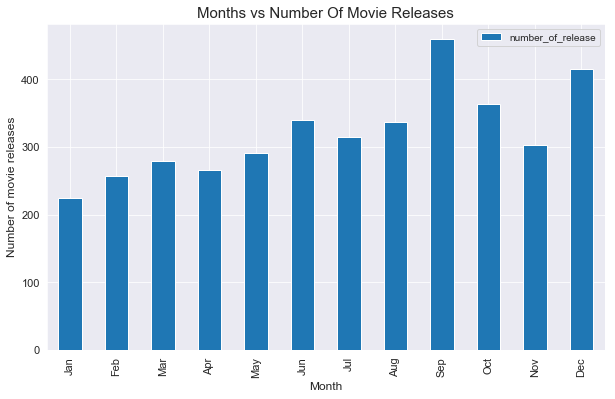

In [43]:
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)


#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(10,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Number of movie releases',fontsize = 12)

#### Question 7. Find the top casts, directors and genres?

In [207]:
# to study about cast, we will separate each all people in each movie into every individuals.
tmdb_df.loc[:,['original_title', 'cast', 'director', 'genres']].head()

,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller


In [208]:
def extract_data(column_name):
    tmdb_df['cast']=tmdb_df['cast'].astype(str)
    tmdb_df['director']=tmdb_df['director'].astype(str)
    
    # From the column entered, eparate the string by '|'
    all_data = tmdb_df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

#### Most Frequent Cast

In [209]:
# Use the function for the casts.

cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)

top_cast = cast_count.head(10)
top_cast

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Brad Pitt,34
Harrison Ford,34
Tom Hanks,34
Sylvester Stallone,34


####  Most Succesful Directors

In [210]:
# Use the function for the directors

director_count = extract_data('director')
director_count = pd.DataFrame(data=director_count)

top_director = director_count.head(10)
top_director

,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Martin Scorsese,17
Steven Soderbergh,17
Tim Burton,17
Robert Rodriguez,17
Oliver Stone,15
Robert Zemeckis,15


####  Most Succesful genres

In [211]:
# Use the function for the genres

genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)

top_genres = genres_count.head(10)
top_genres

,0
Drama,1753
Comedy,1357
Thriller,1203
Action,1085
Adventure,749
Romance,666
Crime,651
Science Fiction,519
Horror,463
Family,425


#### Question 8 : What is the  Average Budget of the movies?

In [202]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()


In [201]:
profit_avg('budget')

60312904.62528048

#### Question 9 : What is the  Average Revenue earned by the movies?

In [203]:
profit_avg('revenue')

253067948.17127898

#### Question 10 : What is the Average duration of the movies?



In [205]:
profit_avg('runtime')

113.63126402393418

<a id='conclusions'></a>
## Conclusions

>The TMDb movie dataset provide many information on all movies. After Data Wrangling, null values, duplicated values and 0 values were removed to provide more accurate results.  
We came out with some very interesting facts about movies. After this analysis we can conclude following:
>
>**For a Movie to be in successful criteria**

    •	Average Budget must be around 60 millon dollar
    •	Average duration of the movie must be 113 minutes (1 hr 53min)
    •	Profits: profits has positive relationship with budget and popularity
    •	Any one of these should be in the cast: Robert De Niro , Bruce Willis,  Sylvester Stallone, Samuel L. Jackson
    •	Genre must be: Comedy, Drama., Action, Thriller.
    •	Director must be: Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen

>**Limitation:**
>Although we successfully predited the above properties on TMDb movie dataset, there are many infomation removed such as rows contained 0 values and null values. The dataset was cut by few thousand rows of movies, which would definitly affect the result.


